<h1>Linear Regression</h1>

In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.linear_model import (RANSACRegressor,HuberRegressor)

from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
df = pd.read_csv('../../Downloads/felicidad.csv')
df.head(5)

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     155 non-null    object 
 1   rank        155 non-null    int64  
 2   score       155 non-null    float64
 3   high        155 non-null    float64
 4   low         155 non-null    float64
 5   gdp         155 non-null    float64
 6   family      155 non-null    float64
 7   lifexp      155 non-null    float64
 8   freedom     155 non-null    float64
 9   generosity  155 non-null    float64
 10  corruption  155 non-null    float64
 11  dystopia    155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [40]:
df.isnull().sum()

country       0
rank          0
score         0
high          0
low           0
gdp           0
family        0
lifexp        0
freedom       0
generosity    0
corruption    0
dystopia      0
dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,155.0,78.000000,44.888751,1.000000,39.500000,78.000000,116.500000,155.000000
score,155.0,5.354019,1.131230,2.693000,4.505500,5.279000,6.101500,7.537000
high,155.0,5.452326,1.118542,2.864884,4.608172,5.370032,6.194600,7.622030
low,155.0,5.255713,1.145030,2.521116,4.374955,5.193152,6.006527,7.479556
gdp,155.0,0.984718,0.420793,0.000000,0.663371,1.064578,1.318027,1.870766
family,155.0,1.188898,0.287263,0.000000,1.042635,1.253918,1.414316,1.610574
lifexp,155.0,0.551341,0.237073,0.000000,0.369866,0.606042,0.723008,0.949492
freedom,155.0,0.408786,0.149997,0.000000,0.303677,0.437454,0.516561,0.658249
generosity,155.0,0.246883,0.134780,0.000000,0.154106,0.231538,0.323762,0.838075
corruption,155.0,0.123120,0.101661,0.000000,0.057271,0.089848,0.153296,0.464308


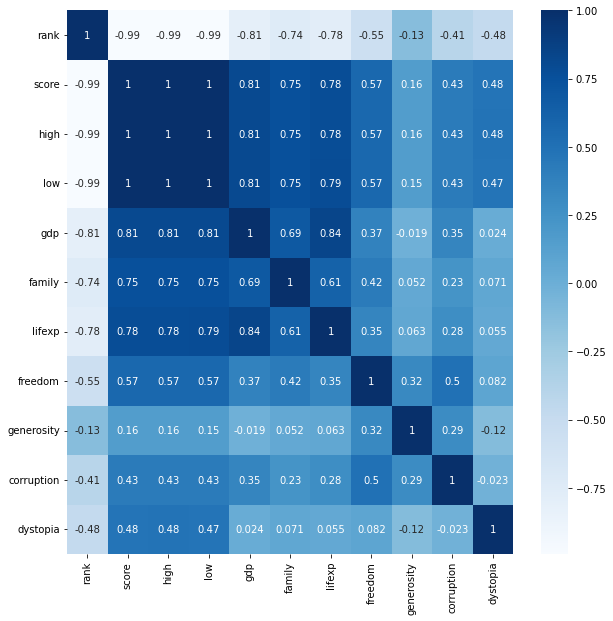

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

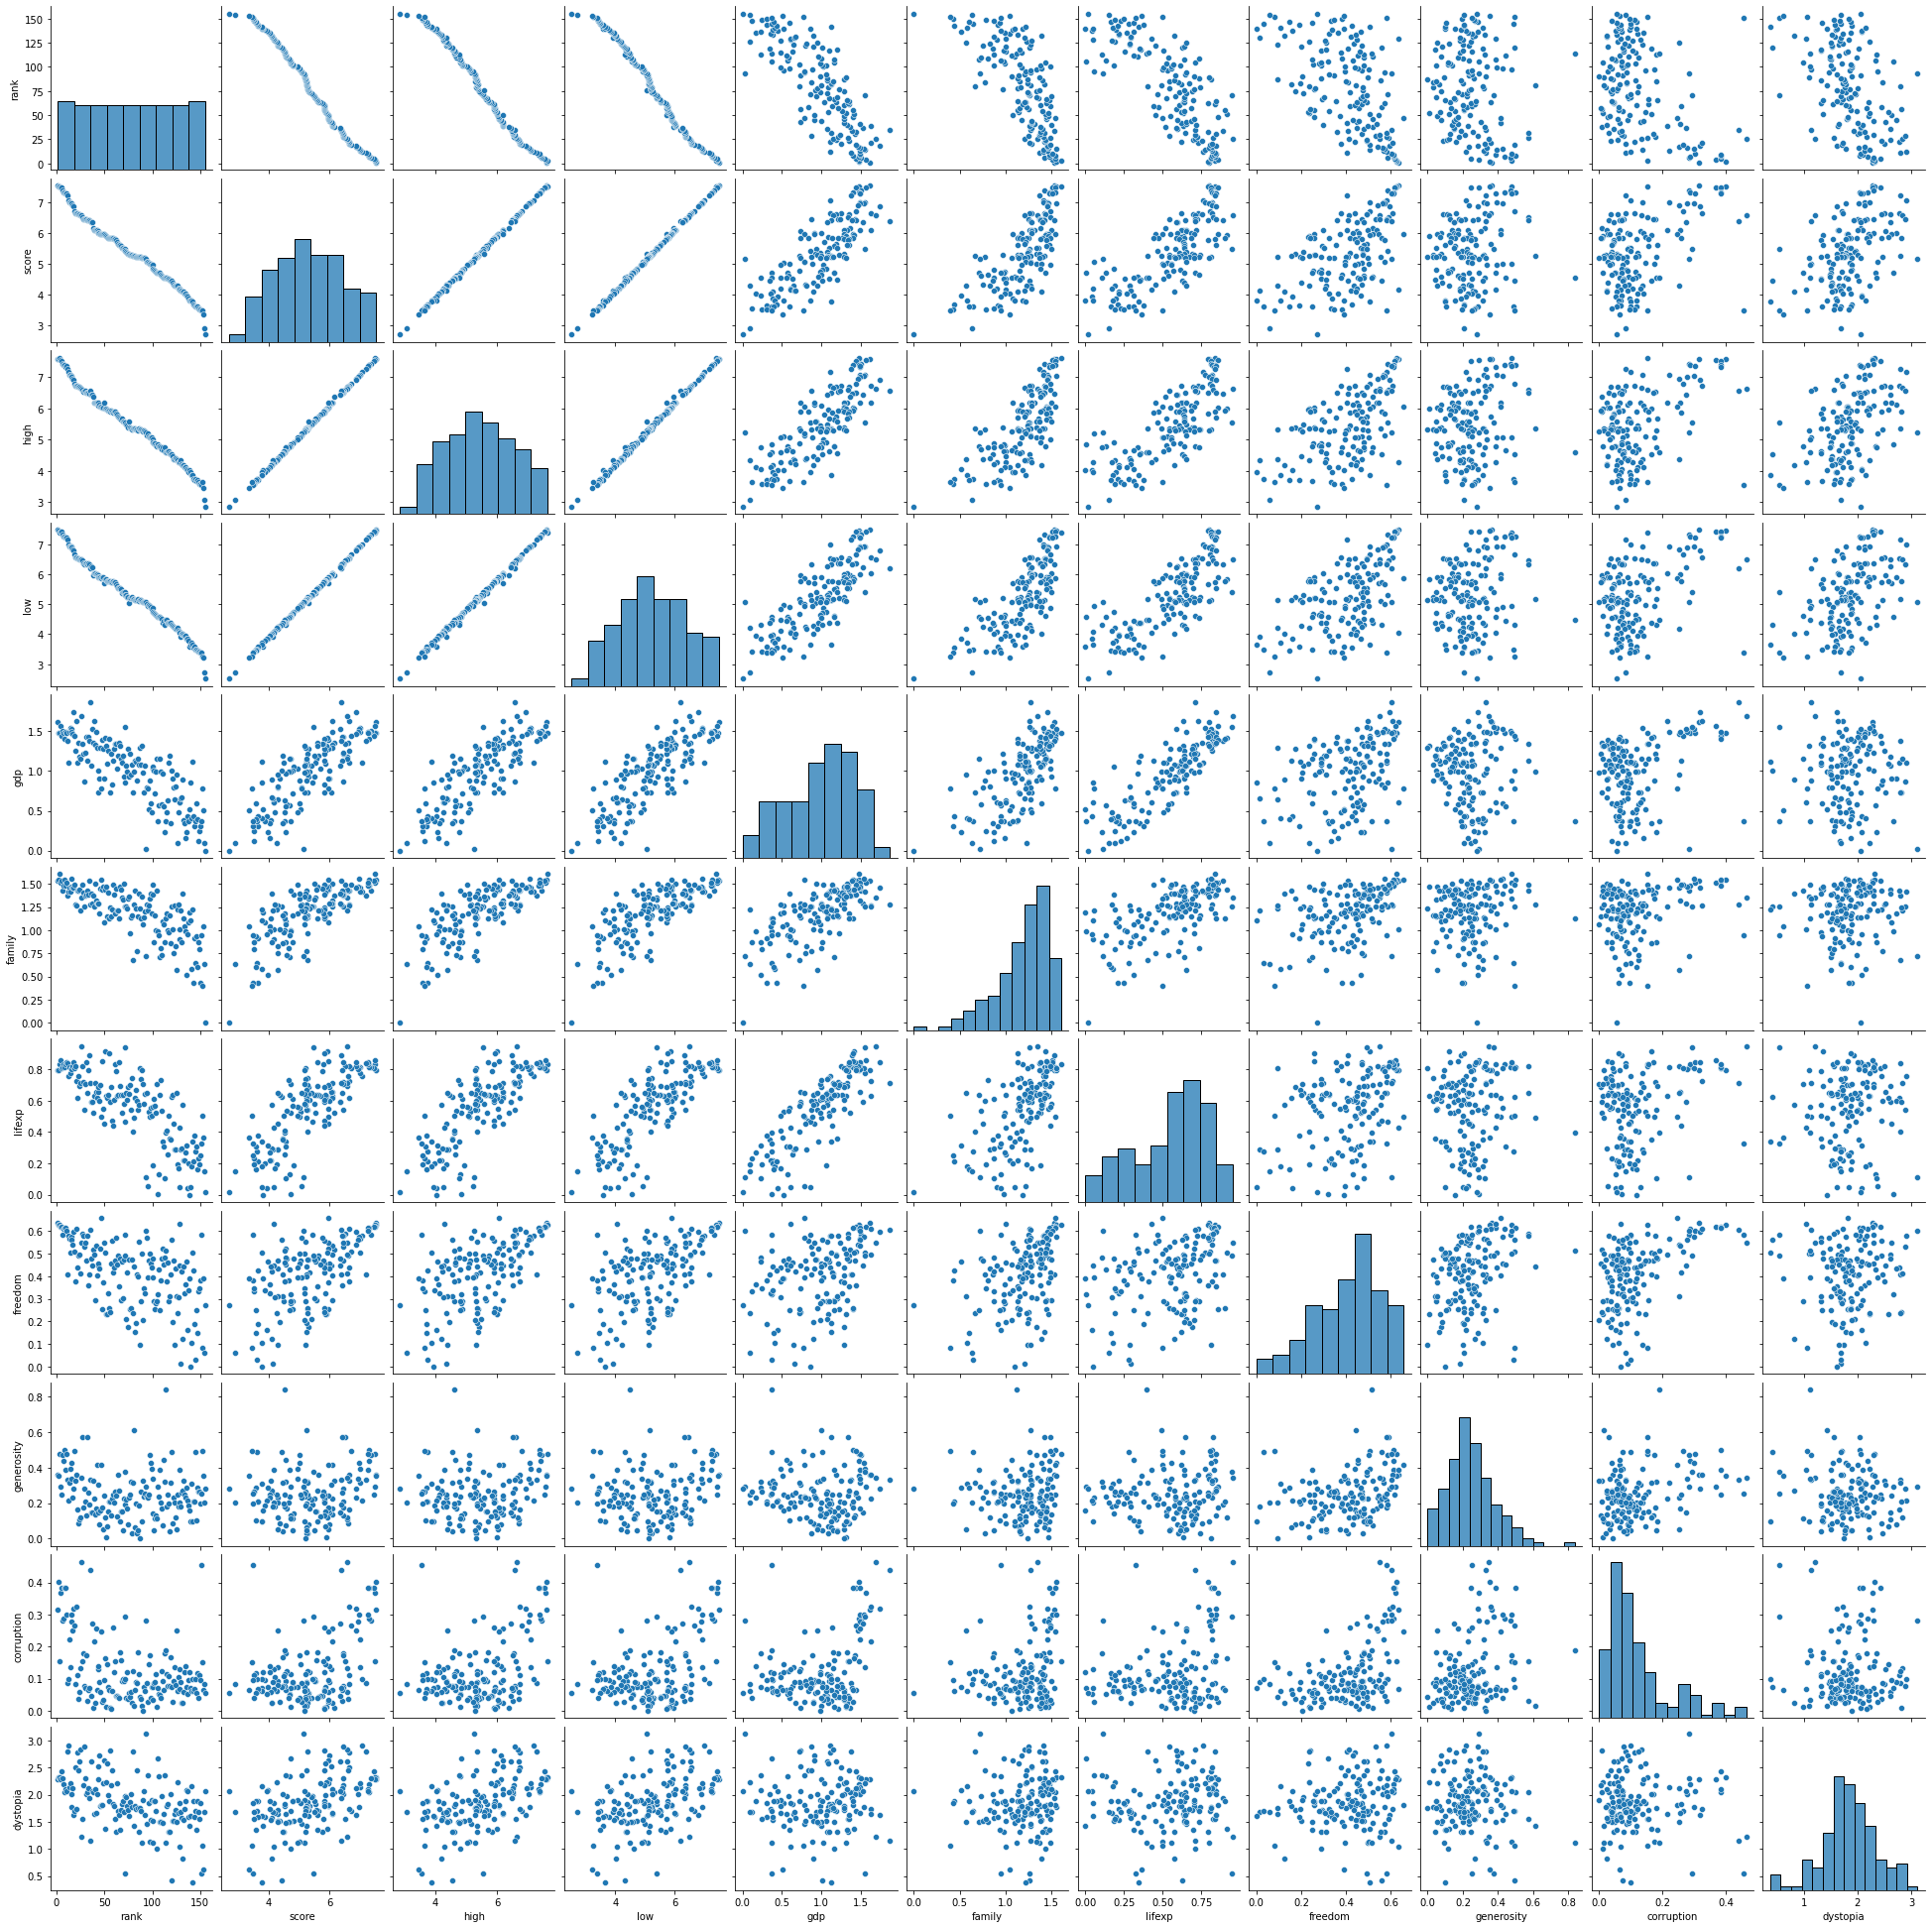

In [43]:
sns.pairplot(df)

<Figure size 720x1152 with 0 Axes>

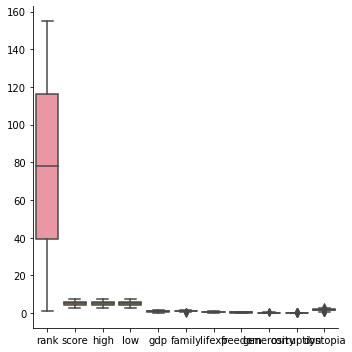

In [44]:
plt.figure(figsize=(10,16))
sns.catplot(data=df,kind='box')
plt.show()

In [45]:
#separacion de features y target
X = df[['gdp','family','lifexp','freedom','corruption','generosity','dystopia']]
y = df.score

In [46]:
#datos de entrenamiento y testeo
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
#dimensiones 
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((116, 7), (116,), (39, 7), (39,))

In [49]:
#creacion del modelo Regresion lineal
model_lineal = LinearRegression().fit(X_train,y_train)
linear_predict = model_lineal.predict(X_test)

#lasso
model_lasso = Lasso(alpha=0.02).fit(X_train,y_train)
lasso_predict = model_lasso.predict(X_test)

#Ridge 
model_ridge = Ridge(alpha=0.02).fit(X_train,y_train)
ridge_predict = model_ridge.predict(X_test)

#calculo de las perdidas por el metodo de error minimo cuadratico
lineal_error = mean_squared_error(y_test,linear_predict)
lasso_error = mean_squared_error(y_test,lasso_predict)
ridge_error = mean_squared_error(y_test,ridge_predict)

In [50]:
#imprimir errores
print(f'linear loss: {lineal_error}')
print(f'lasso loss: {lasso_error}')
print(f'ridge loss: {ridge_error}')

linear loss: 9.893337283096714e-08
lasso loss: 0.049605751139829096
ridge loss: 3.594088032877117e-06


In [52]:
#coeficiones

#lineal
print(f'coef lineal: {model_lineal.coef_}')
#lasso
print(f'coef lasso: {model_lasso.coef_}')
#risge
print(f'coef ridge: {model_ridge.coef_}')

coef lineal: [1.00012843 0.99994621 0.99983515 1.00003428 0.99977126 1.00025981
 0.99993814]
coef lasso: [1.28921417 0.91969417 0.47686397 0.73297273 0.         0.14245522
 0.89965327]
coef ridge: [1.0029179  0.9990225  0.99525585 0.99867193 0.98824232 0.99338891
 0.9990698 ]


<h2>regresion robusta</h2>

In [61]:
estimadores = {'SVR': SVR(gamma='auto',C=0.1,epsilon=0.1),
               'RANSAR' : RANSACRegressor(),
               'HUBER' : HuberRegressor(epsilon=1.35)}

SVR
MSE: 0.31633036753068094


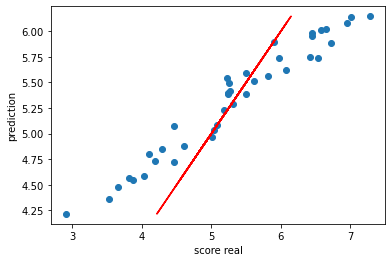

RANSAR
MSE: 9.893337283086386e-08


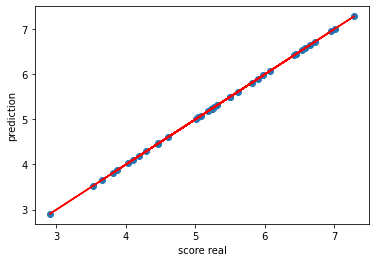

HUBER
MSE: 1.0157533840784086e-07


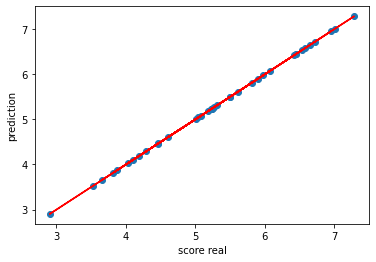

In [62]:
for name,estimador in estimadores.items():
    estimador.fit(X_train,y_train)
    predictions = estimador.predict(X_test)
    
    print(name)
    print(f'MSE: {mean_squared_error(y_test,predictions)}')
    print('='*10)
    plt.scatter(y_test,predictions)
    plt.plot(predictions,predictions,c='r')
    plt.xlabel('score real')
    plt.ylabel('prediction')
    plt.show()